In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [2]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

# Check the files
os.listdir("titanic_data")

['gender_submission.csv', 'train.csv', 'test.csv']

In [3]:
import pandas as pd

# Adjust filename if needed (train.csv or titanic.csv)
df = pd.read_csv("titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()        # Overview of null values
df.isnull().sum()  # Count of nulls column-wise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)

# Verify again
df.isnull().sum()

/tmp/ipython-input-5-3666381959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-3666381959.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


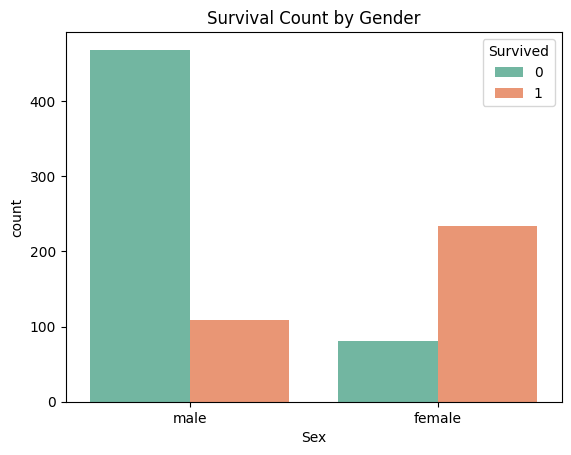

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title("Survival Count by Gender")
plt.show()

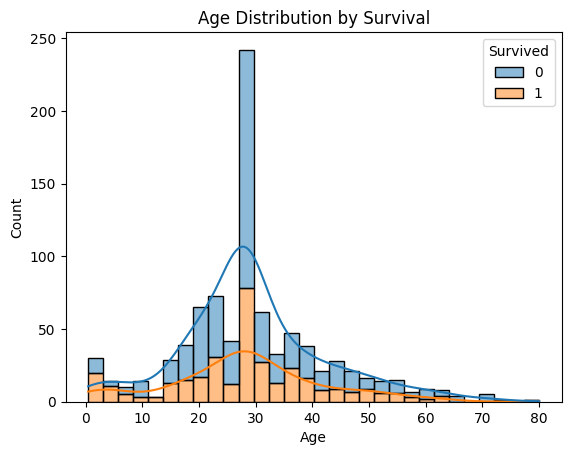

In [7]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

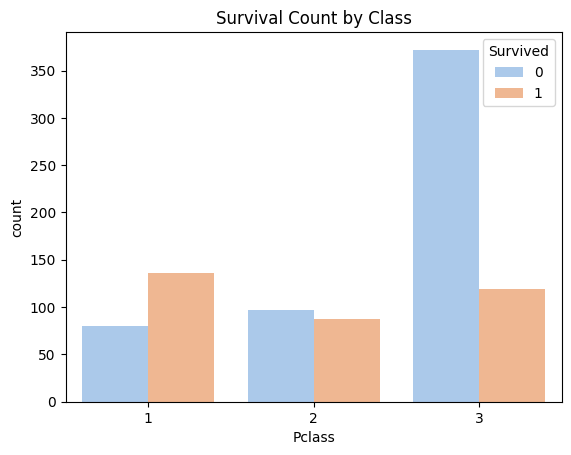

In [8]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title("Survival Count by Class")
plt.show()

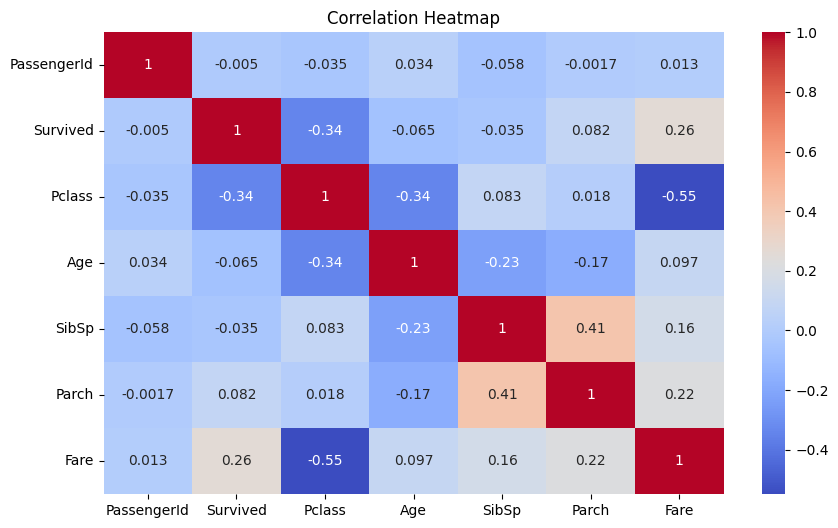

In [9]:
import numpy as np

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Task 02 – Titanic Dataset EDA Summary:

- Cleaned missing values from Age, Embarked, and dropped Cabin.
- Analyzed survival rates by gender, class, and age.
- Found that:
  - Females had higher survival rates.
  - Higher-class passengers had better survival chances.
  - Most survivors were younger.

Tools used: Pandas, Matplotlib, Seaborn.
